Showing gain control can create anticipative signals
by using a Gaussian pulse

created by ckc on Sept 9, 2021

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy import signal
from scipy.fftpack import fft, fftfreq
from scipy.io import loadmat
from scipy.signal import savgol_filter
%matplotlib inline
from random import gauss

In [2]:
nstep = 5000
x = np.zeros(nstep)
b = 100
i0 = 2500
for i in range(nstep):
    a = ((i - i0)/b)**2
    x[i] = np.exp(-a)
    #if i> i0:
     #   x[i] = 0.0

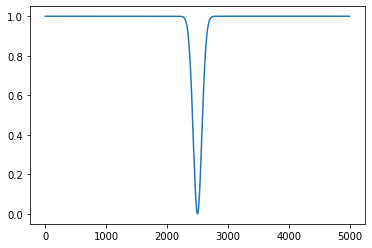

In [3]:
x = 1-x
plt.plot(x)

In [4]:
#AGC
gain =np.ones(nstep)
delay = int(10/0.05)
delay = int(b/2)
B =1
y = x.copy()
for i in range(delay,nstep):
    gain[i] = 1/(1+B*y[i-delay]**2)
    y[i]= gain[i]*x[i]

0.0


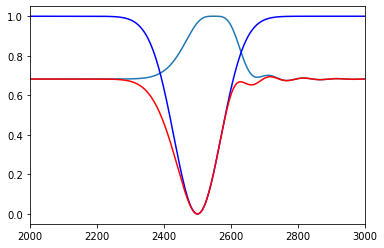

In [5]:
plt.plot(gain)
plt.plot(x,'b')
plt.plot(y/y.max(),'r')
plt.xlim([2000,3000])
print((np.argmax(x)-np.argmax(y))/b)